### Imports

In [447]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Data Frame

In [448]:
# df = pd.read_csv('../../csv/demand.csv', index_col=0)
# df = df.drop(['2015', '2016', '2017', '2018', '2019', '2020', '2021'], axis=1)
# df = df.reset_index()
# df['index'] = pd.to_datetime(df['index'], format="[%d-%m]")
# df['index'] = df['index'].astype('string')
# df['index'] = df['index'].str.replace('1900', '2022')
# df['2022'] = df['2022'].shift(-1)
# df.rename(columns = {'index':'ds', '2022':'y'}, inplace = True)
# df

In [449]:
demand_data = pd.read_csv('../../csv/Combined_Data_Frame.csv', index_col=0)
demand_data = demand_data.drop(['Wind Speed', 'Air Temperature', 'Air Temperature(Apparent)', 'Cloud Coverage'] , axis=1)
demand_data = demand_data.reset_index()
demand_data.rename(columns = {'Record Date':'ds', 'Total Demand':'y'}, inplace = True)

In [450]:
demand_data

,ds,y
0,2021-01-01,63342.0
1,2021-01-02,67819.0
2,2021-01-03,67018.0
3,2021-01-04,75574.0
4,2021-01-05,78002.0
...,...,...
1455,2018-12-27,68436.0
1456,2018-12-28,68179.0
1457,2018-12-29,64849.0
1458,2018-12-30,61282.0


### How many days do you want to predict
Input the the variable how much day you would want to input

In [451]:
# Period - How much in the future should the model predict
period = 60

# Split Data Set

"Train set - date interval from 2018/01/01 till 2020/12/31" | 
"Test set - date interval from 2021/01/01 till 2021/12/31"

In [452]:
# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds <= '2021-01-01')]
test_set = demand_data[(demand_data.ds > '2021-01-01')]
# test_set = df[(df.ds >= '2022-01-01')]

#select the period of the test set
test_set = test_set[:period]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])


/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/4185509678.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])


# Running the forecast model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.5011
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       2884.13   0.000133143       91.7126   5.696e-07       0.001      125  LS failed, Hessian reset 
      99        2884.8   0.000831799       202.352      0.7284      0.7284      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       2886.48   0.000100994       93.2373   6.794e-07       0.001      288  LS failed, Hessian reset 
     170       2886.61   0.000169593       138.706    1.93e-06       0.001      331  LS failed, Hessian reset 
     199       2886.71   6.54724e-05       58.5808           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       2886.72   6.44294e-05       91.6495    7.99e-07       0.001      463  LS failed, Hessian reset 
     299       2886.81     0.0101525       126.469          10   

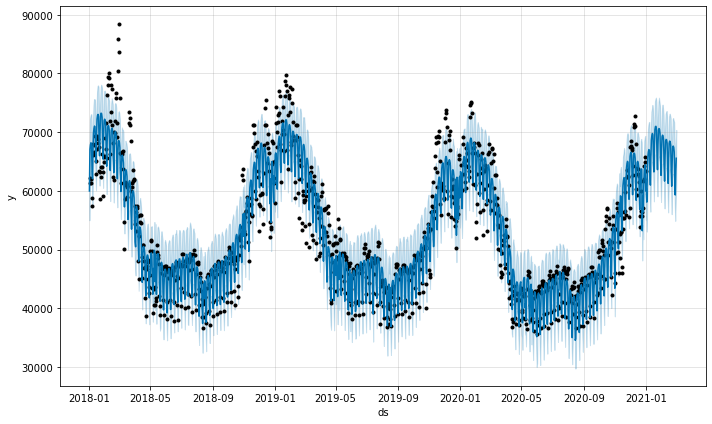

In [453]:
#Facebook prophet model
m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')

#fitting the model
model = m.fit(train_set)

#Create a prediction dataframe
future = m.make_future_dataframe(periods=period,freq='D')

#Create forecast
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

### Prep for metric

In [454]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice 1918,Armistice 1918_lower,Armistice 1918_upper,Armistice 1945,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,55022.321702,54986.445256,64911.269905,55022.321702,55022.321702,0.0,0.0,0.0,0.0,...,-748.063075,-748.063075,-748.063075,9916.753259,9916.753259,9916.753259,0.0,0.0,0.0,59978.941280
1,2018-01-02,55021.598407,62566.798752,72223.741292,55021.598407,55021.598407,0.0,0.0,0.0,0.0,...,1836.233103,1836.233103,1836.233103,10216.967334,10216.967334,10216.967334,0.0,0.0,0.0,67074.798844
2,2018-01-03,55020.875112,62920.376705,72775.818379,55020.875112,55020.875112,0.0,0.0,0.0,0.0,...,2268.840887,2268.840887,2268.840887,10550.452493,10550.452493,10550.452493,0.0,0.0,0.0,67840.168492
3,2018-01-04,55020.151817,63389.998586,73067.268052,55020.151817,55020.151817,0.0,0.0,0.0,0.0,...,2261.045816,2261.045816,2261.045816,10912.469997,10912.469997,10912.469997,0.0,0.0,0.0,68193.667630
4,2018-01-05,55019.428523,63400.050174,73043.050694,55019.428523,55019.428523,0.0,0.0,0.0,0.0,...,1731.252895,1731.252895,1731.252895,11297.728139,11297.728139,11297.728139,0.0,0.0,0.0,68048.409556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2021-02-26,53083.141154,61748.960543,71685.128001,52946.998262,53221.911678,0.0,0.0,0.0,0.0,...,1731.252895,1731.252895,1731.252895,11825.554030,11825.554030,11825.554030,0.0,0.0,0.0,66639.948079
1152,2021-02-27,53093.898857,57707.882983,67357.441747,52951.778726,53235.677568,0.0,0.0,0.0,0.0,...,-2289.596675,-2289.596675,-2289.596675,11550.152739,11550.152739,11550.152739,0.0,0.0,0.0,62354.454921
1153,2021-02-28,53104.656560,54893.758372,64085.574073,52958.885398,53250.264225,0.0,0.0,0.0,0.0,...,-5059.712950,-5059.712950,-5059.712950,11251.751564,11251.751564,11251.751564,0.0,0.0,0.0,59296.695173
1154,2021-03-01,53115.414263,58225.298296,67757.929607,52965.011939,53265.283131,0.0,0.0,0.0,0.0,...,-748.063075,-748.063075,-748.063075,10932.405257,10932.405257,10932.405257,0.0,0.0,0.0,63299.756445


In [455]:
#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

# Final Model

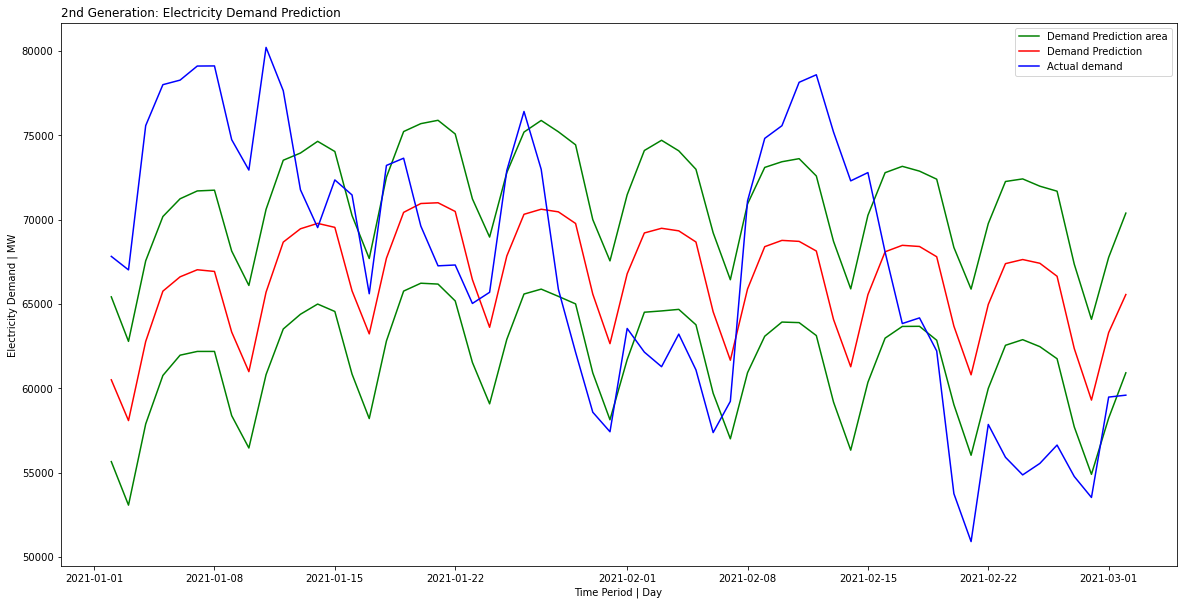

Model MAE:
6937.3886431708615


In [456]:
plt.figure(figsize=(20, 10))
plt.title("2nd Generation: Electricity Demand Prediction ", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/1996338996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/1996338996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -18.5444
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2882.7   0.000187441       59.2145      0.7474      0.7474      144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       2884.13   0.000114215       94.1678   6.142e-07       0.001      257  LS failed, Hessian reset 
     199       2884.37   8.79145e-05        87.318       0.538           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       2884.42   0.000418811       103.958   3.882e-06       0.001      385  LS failed, Hessian reset 
     299       2884.63    0.00766506       91.6226      0.7123           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       2884.64   0.000506112       110.724   5.524e-06       0.001      515  LS failed, Hessian rese

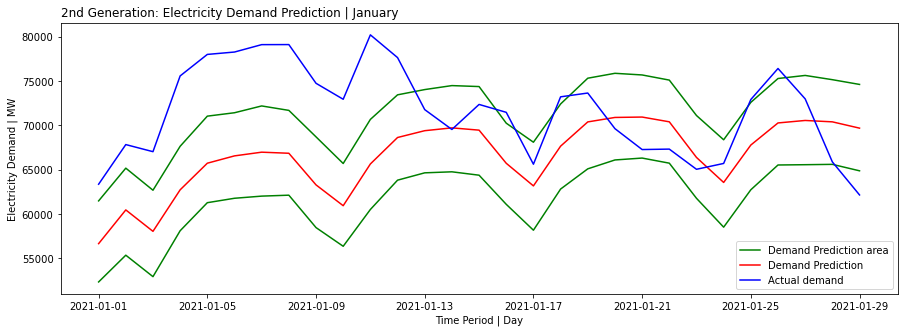

Model MAE:
6596.68535006194


In [457]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-01-01')]
test_set = demand_data[(demand_data.ds >= '2021-01-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

# #Data visualization from the official source
# figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | January", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/76366821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/76366821.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.115
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2930.9    0.00250349       98.1393           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117        2931.7   0.000387612       269.776   1.973e-06       0.001      201  LS failed, Hessian reset 
     166        2932.9   9.10805e-05       91.0044   7.188e-07       0.001      324  LS failed, Hessian reset 
     199       2933.19   0.000184306       97.4581      0.1795           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       2933.23   0.000135961       88.1306   1.621e-06       0.001      441  LS failed, Hessian reset 
     299       2933.32   0.000154016       72.4532           1           1      538   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

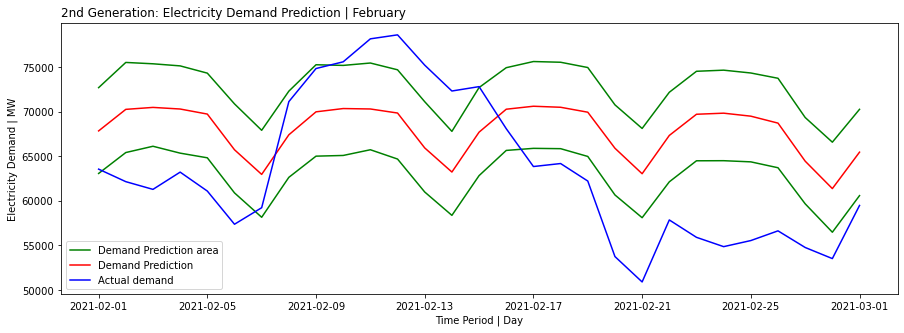

Model MAE:
8211.57624912224


In [458]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-02-01')]
test_set = demand_data[(demand_data.ds >= '2021-02-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
# figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | February", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/2393131358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/2393131358.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.0579
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2958.78     0.0010933       154.816           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105        2958.9   0.000128023       116.241   1.718e-06       0.001      162  LS failed, Hessian reset 
     196       2959.87   0.000141863       132.249   1.141e-06       0.001      321  LS failed, Hessian reset 
     199        2959.9   0.000161622       92.1251      0.5663      0.5663      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2960.09   0.000550078       80.1095           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       2960.64   9.11108e-05       95.8345   9.735e-07       0.001      549  LS failed, Hessian rese

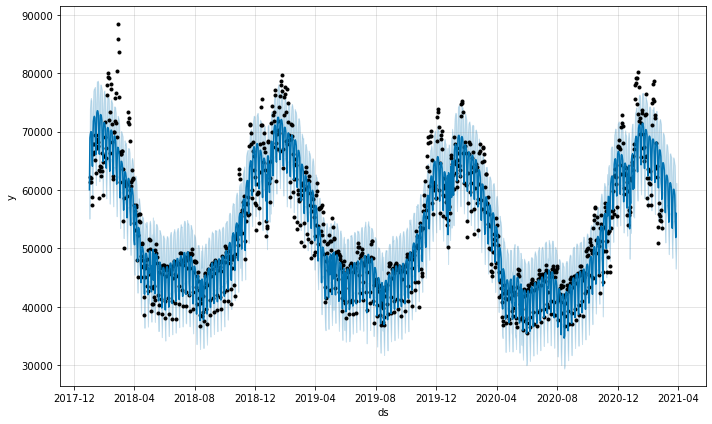

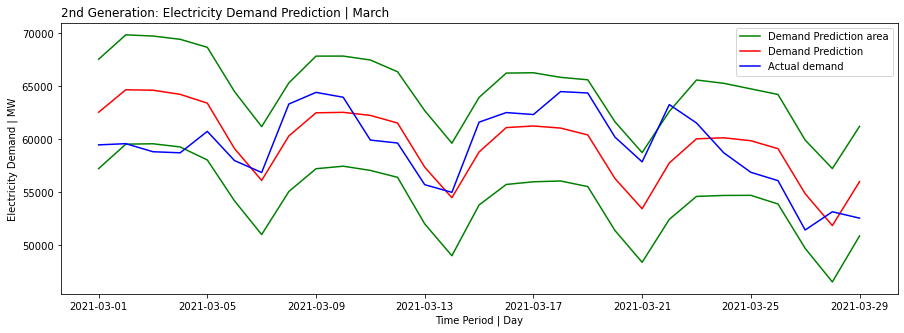

Model MAE:
2772.147953947798


In [459]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-03-01')]
test_set = demand_data[(demand_data.ds >= '2021-03-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | March", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/3345374193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/3345374193.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -11.7219
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3041.17     0.0008013        78.555           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3043.09    0.00232197       89.4908           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3043.64   3.96729e-05       73.3343      0.9519      0.9519      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       3043.76   0.000331471       106.019   3.725e-06       0.001      494  LS failed, Hessian reset 
     399       3043.81   1.35609e-05       75.2269      0.2148           1      601   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     448       3043.83     2.997e-07    

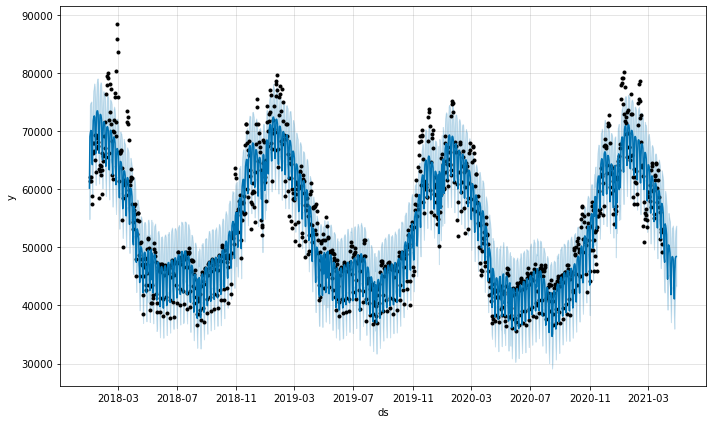

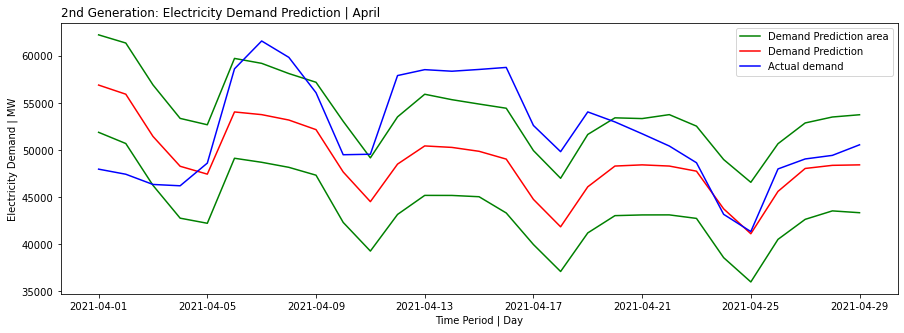

Model MAE:
4885.98199448685


In [460]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-04-01')]
test_set = demand_data[(demand_data.ds >= '2021-04-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | April", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/1635129034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/1635129034.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -11.8798
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3109.55   0.000297193       71.1619      0.7614      0.7614      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       3110.45   0.000129131       122.846   1.036e-06       0.001      236  LS failed, Hessian reset 
     199       3111.14   0.000284826       80.9819           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3111.32    0.00302838       152.237           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       3111.36   4.33699e-05       75.4578   7.172e-07       0.001      476  LS failed, Hessian reset 
     399       3111.45    1.3296e-07       64.1444      0.5438      0.5438      600   
    Iter      log pro

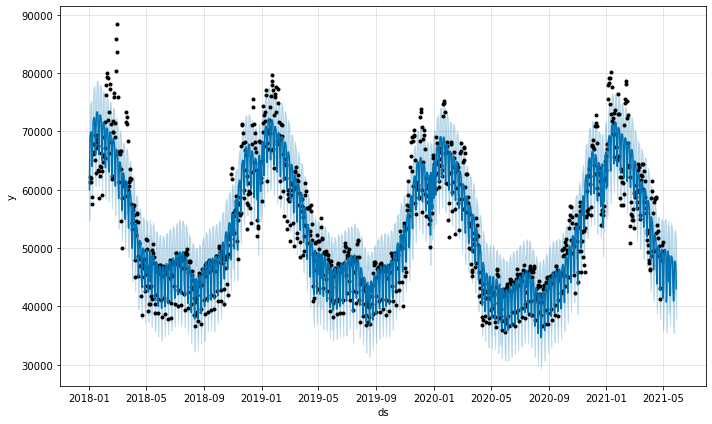

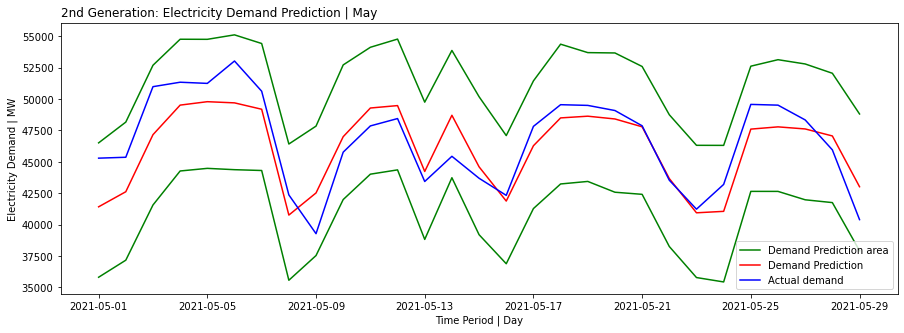

Model MAE:
1634.201085809786


In [461]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-05-01')]
test_set = demand_data[(demand_data.ds >= '2021-05-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | May", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/4203804247.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/4203804247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.3898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          3200     0.0019932       96.9131       0.948       0.948      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       3202.23   0.000434388       242.221   4.148e-06       0.001      238  LS failed, Hessian reset 
     199       3202.27    1.3741e-06       63.8981      0.3902      0.3902      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       3202.27   1.20397e-05       73.1516   1.549e-07       0.001      334  LS failed, Hessian reset 
     287       3202.35   2.44798e-07       66.5527      0.3651           1      439   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


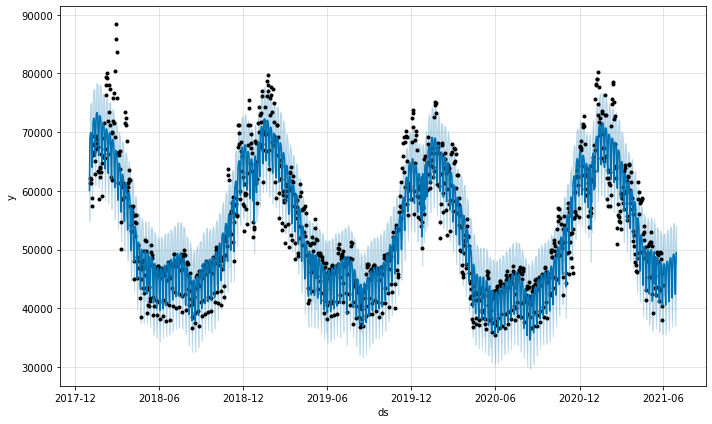

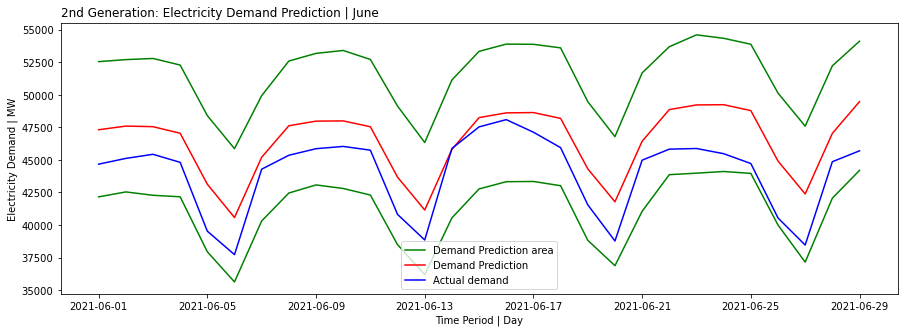

Model MAE:
2446.564728965371


In [462]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-06-01')]
test_set = demand_data[(demand_data.ds >= '2021-06-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | June", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/2163059644.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/2163059644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.0522
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3288.99    0.00323031       121.244           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179        3290.3   7.01822e-05       53.6639   1.056e-06       0.001      255  LS failed, Hessian reset 
     198        3290.3   1.09485e-07        58.562       0.241       0.241      284   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


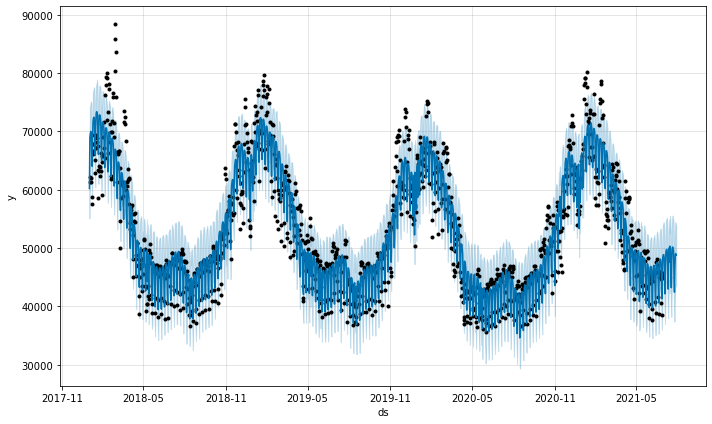

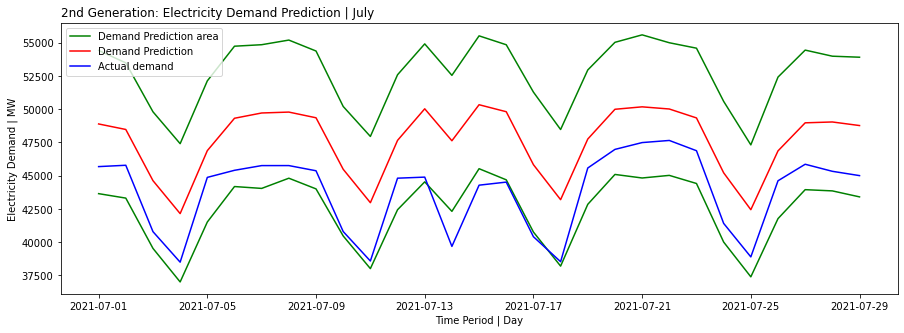

Model MAE:
3815.819233238121


In [463]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-07-01')]
test_set = demand_data[(demand_data.ds >= '2021-07-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | July", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/2926583540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/2926583540.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.6895
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3374.83   0.000699904       99.1274           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3377.49   0.000510364       106.575       0.541       0.541      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       3377.75   0.000113079       92.7728   5.352e-07       0.001      293  LS failed, Hessian reset 
     288       3378.07   0.000127541       131.594   1.159e-06       0.001      454  LS failed, Hessian reset 
     299       3378.09   9.01033e-05       77.4303           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       3378.11   2.61342e-06       62.3549       1.079      0.2699      549   
Optimization terminat

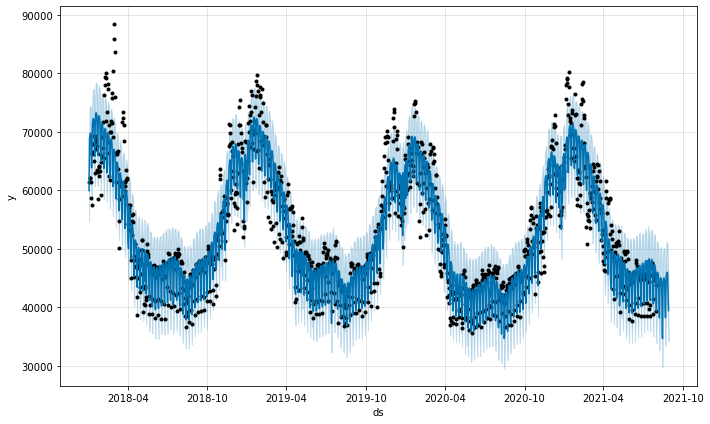

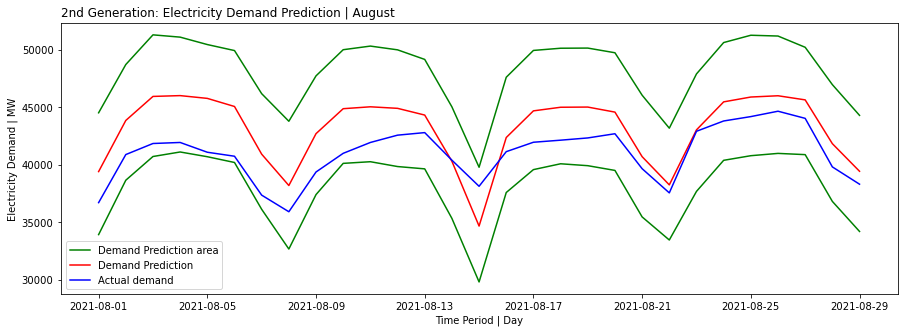

Model MAE:
2386.0879713442478


In [464]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-08-01')]
test_set = demand_data[(demand_data.ds >= '2021-08-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | August", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/3626692216.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/3626692216.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.022
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3467.18    0.00218082       146.485      0.7308     0.07308      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       3469.02   9.08885e-05       106.118   7.425e-07       0.001      279  LS failed, Hessian reset 
     199       3469.14   0.000152964        86.112      0.8833      0.8833      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3469.53   0.000483285       52.7074      0.4049      0.4049      431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       3469.93   0.000132356       107.179   5.137e-07       0.001      526  LS failed, Hessian reset 
     399       3470.18    3.8729e-06       57.2036      0.1807      0.8735      634   
    Iter      log prob

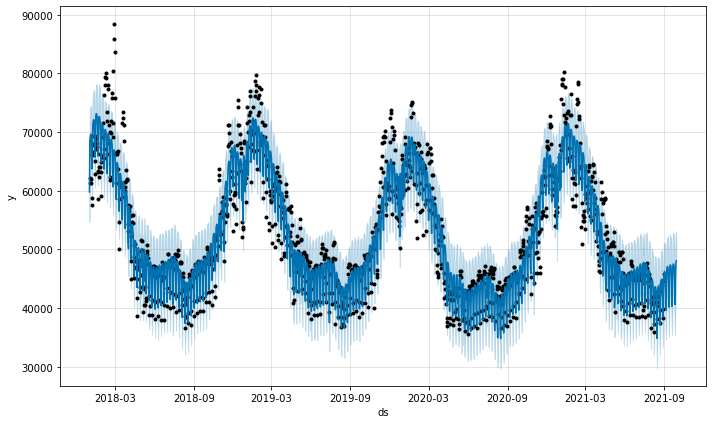

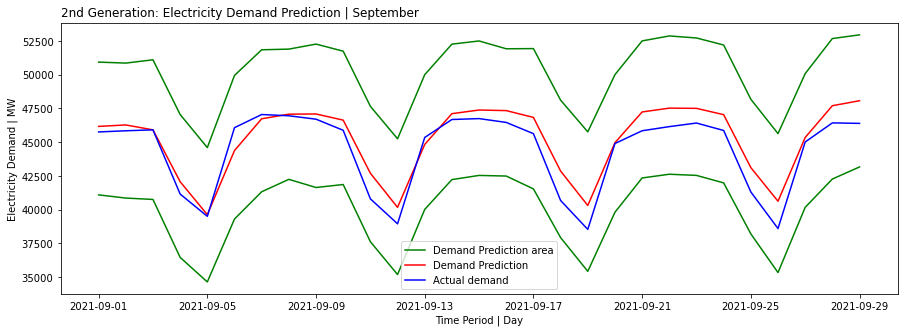

Model MAE:
967.6361913450435


In [465]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-09-01')]
test_set = demand_data[(demand_data.ds >= '2021-09-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | September", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/183630553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/183630553.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.0682
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3559.49    0.00394852       278.814           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3561.82    0.00349194       120.914           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297       3563.12   0.000179362       80.5901   2.239e-06       0.001      426  LS failed, Hessian reset 
     299       3563.13   2.53917e-05       62.3331      0.6227      0.6227      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       3563.13   1.01006e-07       56.1398      0.3963      0.3963      468   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


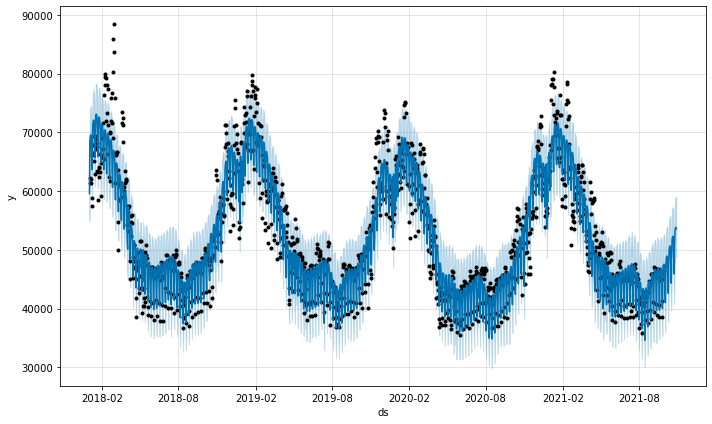

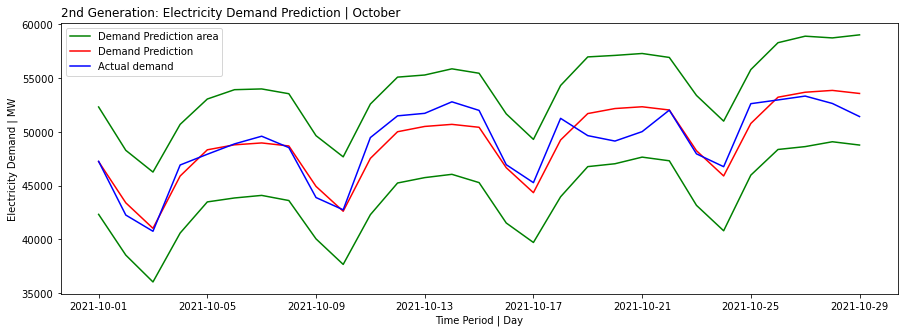

Model MAE:
1062.687261359109


In [466]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-10-01')]
test_set = demand_data[(demand_data.ds >= '2021-10-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | October", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/3376984851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/3376984851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.3311
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3653.46    0.00234209       214.099      0.4877      0.4877      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3655.63    0.00157714       66.0037           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       3655.96   0.000109508        135.96   1.382e-06       0.001      335  LS failed, Hessian reset 
     299       3656.27   1.24328e-05       67.2699       3.621      0.3621      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       3656.27   2.57064e-08       51.7709    0.006636           1      462   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


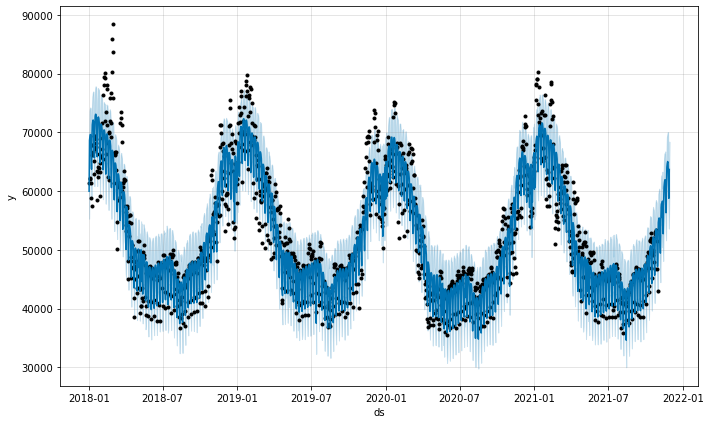

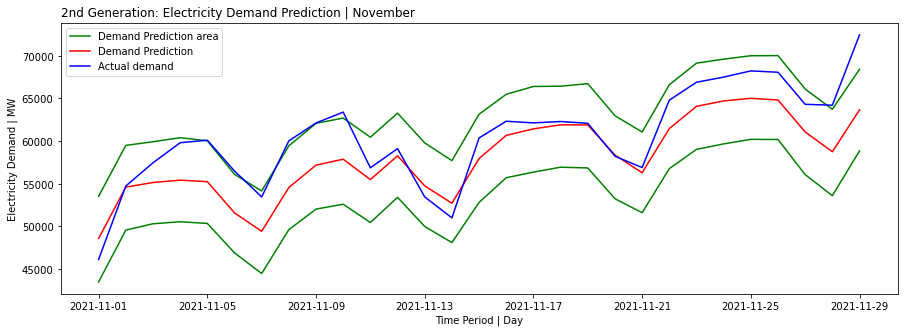

Model MAE:
2870.0848962593222


In [467]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-11-01')]
test_set = demand_data[(demand_data.ds >= '2021-11-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction | November", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/3663067467.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['ds'] = pd.to_datetime(train_set['ds'])
/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_50422/3663067467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['ds'] = pd.to_datetime(test_set['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -33.682
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3736.89    0.00436159       187.141           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       3737.19   0.000106312       115.669   5.483e-07       0.001      171  LS failed, Hessian reset 
     199       3738.68   0.000547443       89.4771           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       3739.31   0.000116078        136.44   6.293e-07       0.001      361  LS failed, Hessian reset 
     299       3739.95   4.03709e-06       63.8936      0.4954      0.6584      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       3739.96   5.51091e-05       71.6864   7.945e-07       0.001      527  LS failed, Hessian reset

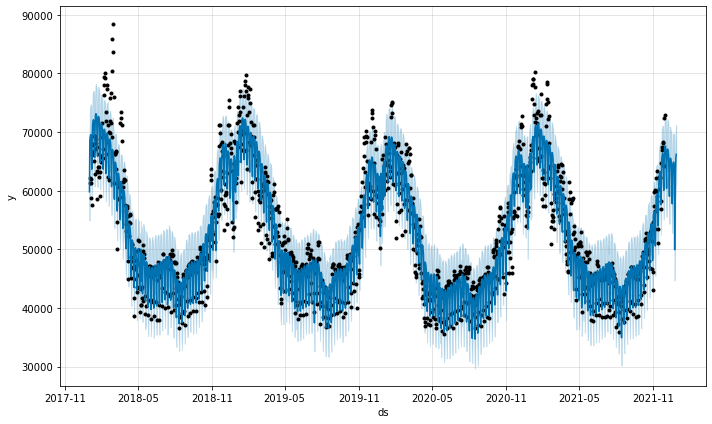

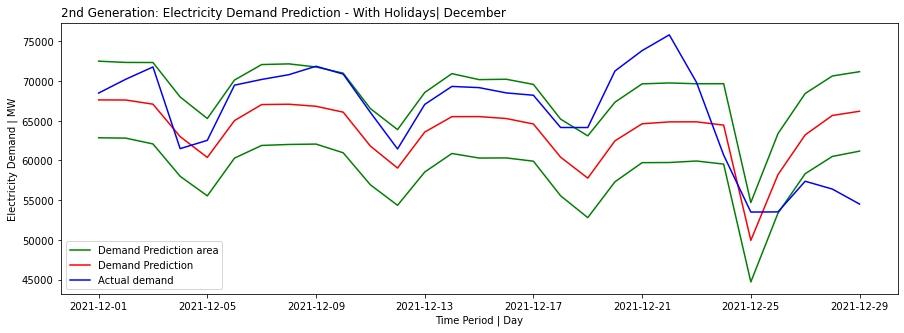

Model MAE:
4841.204553591324


In [470]:
period = 29

# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-12-01')]
test_set = demand_data[(demand_data.ds >= '2021-12-01')]

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
# m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

train_set_pred = forecast[(forecast.ds < '2021-01-01')]



plt.figure(figsize=(15, 5))
plt.title("2nd Generation: Electricity Demand Prediction - No Holidays| December", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))